## 机器学习数据集介绍

## Mnist
[Mnist](http://yann.lecun.com/exdb/mnist/)是机器学习领域中非常经典的一个数据集，由60000个训练样本和10000个测试样本组成，每个样本都是一张28 * 28像素的灰度手写数字图片。

数据大小：torch.Size([100, 1, 28, 28])
标签：
[[5 8 2 3 9 5 8 4 4 5]
 [9 3 3 9 6 3 0 8 7 9]
 [5 3 7 2 2 0 1 7 7 0]
 [8 6 4 1 4 6 9 5 2 1]
 [0 2 5 3 2 4 0 1 7 3]
 [6 5 8 7 1 3 3 0 3 3]
 [3 1 7 3 0 4 3 3 6 0]
 [9 0 5 0 8 1 1 1 3 7]
 [4 7 7 9 5 7 3 7 3 9]
 [9 0 4 9 7 8 7 8 8 3]]


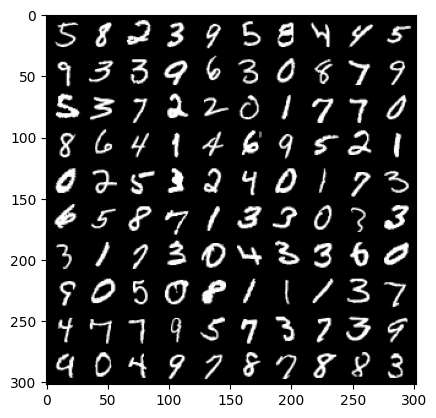

In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

train_dataset = datasets.MNIST(root = './', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = './', train = False, transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(train_loader))
# 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(f"数据大小：{images.shape}")
print(f"标签：\n{labels.reshape(10,10).numpy()}")
plt.imshow(img)
plt.show()

## Iris

Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类


In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
dataset = load_iris()
print(f"训练数据大小：{dataset.data.shape}")
data = dataset.data
labels = dataset.target
X_train,X_test, y_train,y_test = train_test_split(data,labels,train_size=0.8,random_state=True)
# 打印前100张图片
print(f"训练数据：\n{X_train[:10]}\n训练标签：\n{y_train[:10]}")

训练数据大小：(150, 4)
训练数据：
[[6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]]
训练标签：
[1 2 1 2 2 0 1 0 1 2]


## Wine数据集

葡萄酒数据集是来自UCI上面的公开数据集，这些数据是对意大利同一地区种植的葡萄酒进行化学分析的结果，这些葡萄酒来自三个不同的品种。这些数据包括了三种酒中13种不同成分的数量。文件中，每行代表一种酒的样本，共有178个样本；一共有14列，其中，第一个属性是类标识符，分别是1/2/3来表示，代表葡萄酒的三个分类。后面的13列为每个样本的对应属性的样本值。剩余的13个属性是，酒精、苹果酸、灰、灰分的碱度、镁、总酚、黄酮类化合物、非黄烷类酚类、原花色素、颜色强度、色调、稀释葡萄酒的OD280/OD315、脯氨酸。其中第1类有59个样本，第2类有71个样本，第3类有48个样本